In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Load the red wine dataset with the correct delimiter
redWine_df = pd.read_csv(r'C:\Users\sinve\Semester 5\MachineLearning\WineQuality\data\winequality-red.csv', delimiter=';')

# Define high-quality (1) and low-quality (0) classes based on quality threshold
redWine_df['quality_class'] = redWine_df['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Separate features and target variable
X_red = redWine_df.drop(['quality', 'quality_class'], axis=1)
y_red = redWine_df['quality_class']

# Split data into training and testing sets
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

#Logistic Regression model
model_red = LogisticRegression(max_iter=2000)
model_red.fit(X_red_train, y_red_train)
# Make predictions and calculate accuracy for red wine
y_red_pred = model_red.predict(X_red_test)
accuracy_red = accuracy_score(y_red_test, y_red_pred)
print("Baseline Model Accuracy for Red Wine:", accuracy_red) #0.740625 (ok, good start)




from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_red_train, y_red_train)
y_red_pred_rf = rf_model.predict(X_red_test)
accuracy_rf = accuracy_score(y_red_test, y_red_pred_rf)
print("Random Forest Model Accuracy for Red Wine:", accuracy_rf) #0.790625 (better!)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_red_train, y_red_train)
print("Best Parameters:", grid_search.best_params_) #Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
print("Best Accuracy:", grid_search.best_score_) #Best Accuracy: 0.8155208333333335


from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_red, y_red, cv=5, scoring='accuracy')
print("Cross-validated Accuracy for Red Wine:", scores.mean())
#may still be some overfitting on the initial training and test spli due to : Cross-validated Accuracy for Red Wine: 0.7323393416927899 (worse!)


Baseline Model Accuracy for Red Wine: 0.740625
Random Forest Model Accuracy for Red Wine: 0.790625
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8155208333333335
Cross-validated Accuracy for Red Wine: 0.7323393416927899


In [2]:
y_red_pred_best = grid_search.best_estimator_.predict(X_red_test)
print(classification_report(y_red_test, y_red_pred_best))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       141
           1       0.81      0.82      0.81       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



In [3]:
import numpy as np 
feature_importances = grid_search.best_estimator_.feature_importances_
features = X_red.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Red Wine Quality Prediction")
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.show()

NameError: name 'plt' is not defined

In [4]:
cv_scores_tuned = cross_val_score(grid_search.best_estimator_, X_red, y_red, cv=5, scoring='accuracy')
print("Cross-validated Accuracy for Tuned Random Forest Model:", cv_scores_tuned.mean())

Cross-validated Accuracy for Tuned Random Forest Model: 0.7304604231974922


In [5]:
rf_model_simple = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=10, random_state=42)
cv_scores_simple = cross_val_score(rf_model_simple, X_red, y_red, cv=5, scoring='accuracy')
print("Cross-validated Accuracy with Reduced Complexity:", cv_scores_simple.mean())

Cross-validated Accuracy with Reduced Complexity: 0.7248354231974922


In [6]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42)
cv_scores_xgb = cross_val_score(xgb_model, X_red, y_red, cv=5, scoring='accuracy')
print("Cross-validated Accuracy for XGBoost:", cv_scores_xgb.mean())


ModuleNotFoundError: No module named 'xgboost'

In [7]:
rf_model_balanced = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=10, class_weight='balanced', random_state=42)
cv_scores_balanced = cross_val_score(rf_model_balanced, X_red, y_red, cv=5, scoring='accuracy')
print("Cross-validated Accuracy with Balanced Class Weights:", cv_scores_balanced.mean())



Cross-validated Accuracy with Balanced Class Weights: 0.7204584639498433


In [8]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42)
cv_scores_xgb = cross_val_score(xgb_model, X_red, y_red, cv=5, scoring='accuracy')
print("Cross-validated Accuracy for XGBoost:", cv_scores_xgb.mean())



Cross-validated Accuracy for XGBoost: 0.7010619122257052


In [9]:
xgb_model = XGBClassifier(n_estimators=500, max_depth=10, learning_rate=0.01, random_state=42)
cv_scores_xgb = cross_val_score(xgb_model, X_red, y_red, cv=5, scoring='accuracy')
print("Cross-validated Accuracy for XGBoost (Lower Learning Rate):", cv_scores_xgb.mean())



Cross-validated Accuracy for XGBoost (Lower Learning Rate): 0.7091869122257053


In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

cv_scores_gb = cross_val_score(gb_model, X_red, y_red, cv=5, scoring='accuracy')
print("Cross-validated Accuracy for Gradient Boosting:", cv_scores_gb.mean())


Cross-validated Accuracy for Gradient Boosting: 0.7279702194357366


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05, 0.01]
}

grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_gb.fit(X_red, y_red)

print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Cross-validated Accuracy for Gradient Boosting:", grid_search_gb.best_score_)


Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Cross-validated Accuracy for Gradient Boosting: 0.7398393416927899


In [13]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_red_train, y_red_train)
print("Best Parameters from Randomized Search:", random_search.best_params_)
print("Best Cross-validated Accuracy from Randomized Search:", random_search.best_score_)


Best Parameters from Randomized Search: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20, 'bootstrap': True}
Best Cross-validated Accuracy from Randomized Search: 0.8155208333333335


In [14]:
from sklearn.model_selection import cross_val_score

final_rf_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    max_depth=20,
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model:", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))

Test Set Accuracy for Final Random Forest Model: 0.790625
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       141
           1       0.81      0.82      0.81       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



In [15]:
cv_scores_final_rf = cross_val_score(final_rf_model, X_red, y_red, cv=5, scoring='accuracy')
print("Cross-validated Accuracy for Final Random Forest Model:", cv_scores_final_rf.mean())


Cross-validated Accuracy for Final Random Forest Model: 0.7304604231974922


In [16]:
from sklearn.model_selection import StratifiedKFold

stratified_cv = StratifiedKFold(n_splits=5)
cv_scores_stratified = cross_val_score(final_rf_model, X_red, y_red, cv=stratified_cv, scoring='accuracy')
print("Stratified Cross-validated Accuracy for Final Random Forest Model:", cv_scores_stratified.mean())


Stratified Cross-validated Accuracy for Final Random Forest Model: 0.7304604231974922


In [17]:
cv_scores_final_rf = cross_val_score(final_rf_model, X_red, y_red, cv=7, scoring='accuracy')
print("Cross-validated Accuracy for Final Random Forest Model:", cv_scores_final_rf.mean())


Cross-validated Accuracy for Final Random Forest Model: 0.7224228694005757


In [18]:
final_rf_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    max_depth=20,
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model:", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))

Test Set Accuracy for Final Random Forest Model: 0.809375
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       141
           1       0.83      0.83      0.83       179

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [19]:
cv_scores_final_rf = cross_val_score(final_rf_model, X_red, y_red, cv=5, scoring='accuracy')
print("Cross-validated Accuracy for Final Random Forest Model:", cv_scores_final_rf.mean())


Cross-validated Accuracy for Final Random Forest Model: 0.7266967084639498


In [20]:
final_rf_model = RandomForestClassifier(
    n_estimators=150,       
    min_samples_split=10,   
    max_depth=15,            
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model (Adjusted):", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))

Test Set Accuracy for Final Random Forest Model (Adjusted): 0.809375
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       141
           1       0.84      0.82      0.83       179

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [21]:
# Red wine data (this was done earlier, i just didnt do it in jupyter) 
plt.figure(figsize=(12, 6))
sns.boxplot(data=redWine_df)
plt.title('Red Wine Data Distribution')
plt.xticks(rotation=90)
plt.show()


NameError: name 'plt' is not defined

In [22]:
# Red wine data (this was done earlier, i just didnt do it in jupyter) 
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=redWine_df)
plt.title('Red Wine Data Distribution')
plt.xticks(rotation=90)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1200x600 with 0 Axes>

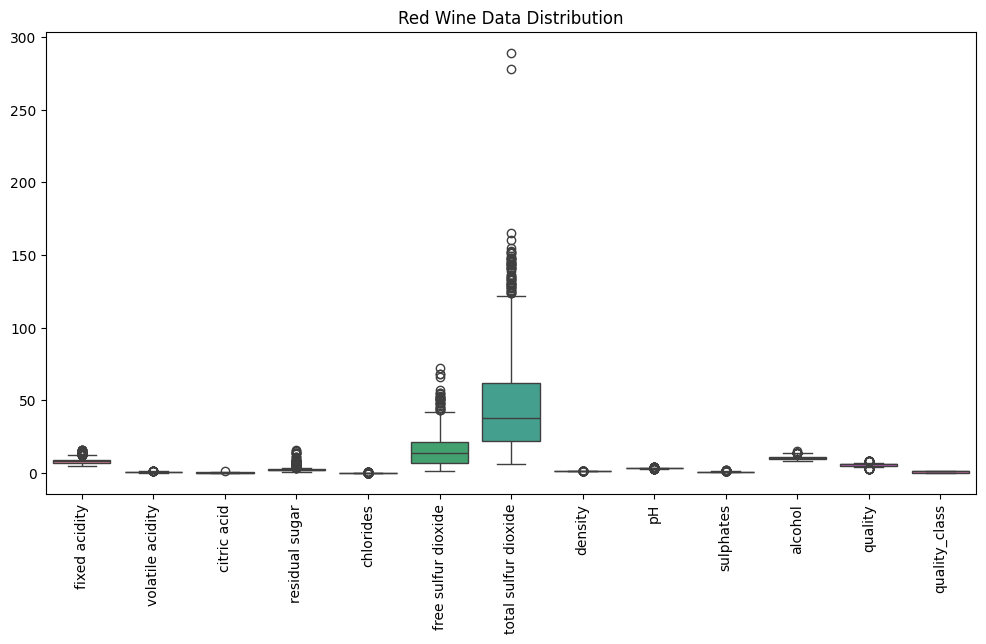

In [23]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=redWine_df)
plt.title('Red Wine Data Distribution')
plt.xticks(rotation=90)
plt.show()

In [24]:
final_rf_model = RandomForestClassifier(
    n_estimators=150,       
    min_samples_split=13,   
    max_depth=12,            
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model (Adjusted):", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))

Test Set Accuracy for Final Random Forest Model (Adjusted): 0.76875
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       141
           1       0.81      0.76      0.79       179

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



In [25]:
final_rf_model = RandomForestClassifier(
    n_estimators=150,       
    min_samples_split=10,   
    max_depth=7,            
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model (Adjusted):", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))

Test Set Accuracy for Final Random Forest Model (Adjusted): 0.76875
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       141
           1       0.82      0.75      0.78       179

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



In [26]:
final_rf_model = RandomForestClassifier(
    n_estimators=150,       
    min_samples_split=10,   
    max_depth=15,            
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model (Adjusted):", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))

Test Set Accuracy for Final Random Forest Model (Adjusted): 0.809375
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       141
           1       0.84      0.82      0.83       179

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [27]:
final_rf_model = RandomForestClassifier(
    n_estimators=150,       
    min_samples_split=10,   
    max_depth=11final_rf_model = RandomForestClassifier(
    n_estimators=150,       
    min_samples_split=10,   
    max_depth=15,            
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model (Adjusted):", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final)),            
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model (Adjusted):", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))

Test Set Accuracy for Final Random Forest Model (Adjusted): 0.784375
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       141
           1       0.82      0.79      0.80       179

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.79      0.78      0.78       320



In [28]:
final_rf_model = RandomForestClassifier(
    n_estimators=200,       
    min_samples_split=10,   
    max_depth=15,            
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model (Adjusted):", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))

Test Set Accuracy for Final Random Forest Model (Adjusted): 0.803125
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       141
           1       0.82      0.83      0.82       179

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



In [29]:
final_rf_model = RandomForestClassifier(
    n_estimators=150,       
    min_samples_split=12,   
    max_depth=15,            
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model (Adjusted):", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))

Test Set Accuracy for Final Random Forest Model (Adjusted): 0.7875
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       141
           1       0.82      0.80      0.81       179

    accuracy                           0.79       320
   macro avg       0.78      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



In [30]:
final_rf_model = RandomForestClassifier(
    n_estimators=150,       
    min_samples_split=10,   
    max_depth=15,            
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model (Adjusted):", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))

Test Set Accuracy for Final Random Forest Model (Adjusted): 0.809375
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       141
           1       0.84      0.82      0.83       179

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [31]:
cv_scores_final_rf = cross_val_score(final_rf_model, X_red, y_red, cv=5, scoring='accuracy')
print("Cross-validated Accuracy for Final Random Forest Model:", cv_scores_final_rf.mean())



Cross-validated Accuracy for Final Random Forest Model: 0.7217006269592476


In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

estimators = [
    ('rf', RandomForestClassifier(n_estimators=150, min_samples_split=10, max_depth=15, bootstrap=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=2000, random_state=42))
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42),
    cv=5
)

stacking_model.fit(X_red_train, y_red_train)

y_red_pred_stack = stacking_model.predict(X_red_test)
accuracy_stack = accuracy_score(y_red_test, y_red_pred_stack)
print("Test Set Accuracy for Stacking Model:", accuracy_stack)
print(classification_report(y_red_test, y_red_pred_stack))


Test Set Accuracy for Stacking Model: 0.809375
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       141
           1       0.84      0.82      0.83       179

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [34]:
final_rf_model = RandomForestClassifier(
    n_estimators=150,       
    min_samples_split=10,   
    max_depth=15,
    max_features='sqrt'
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model (Adjusted):", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))

Test Set Accuracy for Final Random Forest Model (Adjusted): 0.809375
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       141
           1       0.84      0.82      0.83       179

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [35]:
final_rf_model = RandomForestClassifier(
    n_estimators=150,       
    min_samples_split=10,   
    max_depth=15,
    max_features='sqrt',min_samples_leaf=5,
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model (Adjusted):", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))

Test Set Accuracy for Final Random Forest Model (Adjusted): 0.775
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       141
           1       0.81      0.79      0.80       179

    accuracy                           0.78       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.78      0.78      0.78       320



In [37]:
final_rf_model = RandomForestClassifier(
    n_estimators=300,       
    min_samples_split=10,   
    max_depth=15,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Random Forest Model (Adjusted):", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))

Test Set Accuracy for Final Random Forest Model (Adjusted): 0.809375
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       141
           1       0.83      0.83      0.83       179

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [38]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [150, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt', 'log2', 0.7]
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(bootstrap=True, random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_red_train, y_red_train)

print("Best Parameters from Randomized Search:", random_search_rf.best_params_)
print("Best Cross-validated Accuracy from Randomized Search:", random_search_rf.best_score_)


Best Parameters from Randomized Search: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 15}
Best Cross-validated Accuracy from Randomized Search: 0.7920649509803922


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

final_rf_model = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='log2',
    max_depth=15,
    bootstrap=True,
    random_state=42
)

final_rf_model.fit(X_red_train, y_red_train)

y_red_pred_final = final_rf_model.predict(X_red_test)
accuracy_final = accuracy_score(y_red_test, y_red_pred_final)
print("Test Set Accuracy for Final Tuned Random Forest Model:", accuracy_final)
print(classification_report(y_red_test, y_red_pred_final))


Test Set Accuracy for Final Tuned Random Forest Model: 0.7875
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       141
           1       0.81      0.80      0.81       179

    accuracy                           0.79       320
   macro avg       0.78      0.79      0.78       320
weighted avg       0.79      0.79      0.79       320



In [40]:
cv_scores_final_rf = cross_val_score(final_rf_model, X_red, y_red, cv=5, scoring='accuracy')
print("Cross-validated Accuracy for Final Random Forest Model:", cv_scores_final_rf.mean())




Cross-validated Accuracy for Final Random Forest Model: 0.7298275862068965
